## Data Exploration and Data Preprocessing

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from textblob import TextBlob


In [9]:
data=pd.read_csv('blogs.csv') 

In [11]:
data

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [13]:
# Display the first few rows of the dataset
print("Dataset Overview:")
print(data.head())


Dataset Overview:
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [15]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
Data      0
Labels    0
dtype: int64


In [17]:
# Data Preprocessing
# Removing missing values
data = data.dropna()

In [19]:
# Cleaning text
def preprocess_text(text):
    text = text.lower()
    text = ''.join(char for char in text if char.isalnum() or char.isspace())
    return text

data['Data'] = data['Data'].apply(preprocess_text)


In [21]:
# Tokenizing and removing stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to C:\Users\Sonam
[nltk_data]     Sherkar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\Users\Sonam
[nltk_data]     Sherkar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [23]:
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

data['Data'] = data['Data'].apply(remove_stopwords)


In [25]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Data'])
Y = data['Labels']


## Naive Bayes Model for Text Classification

In [27]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [29]:
# Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [31]:
# Predictions
y_pred = model.predict(X_test)


## Evaluation

In [33]:
print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")



Evaluation Metrics:
Accuracy: 0.82
Precision: 0.84
Recall: 0.82
F1-Score: 0.81


In [35]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.62      0.83      0.71        18
 comp.os.ms-windows.misc       0.95      0.86      0.90        22
comp.sys.ibm.pc.hardware       0.95      0.76      0.84        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.94      0.88      

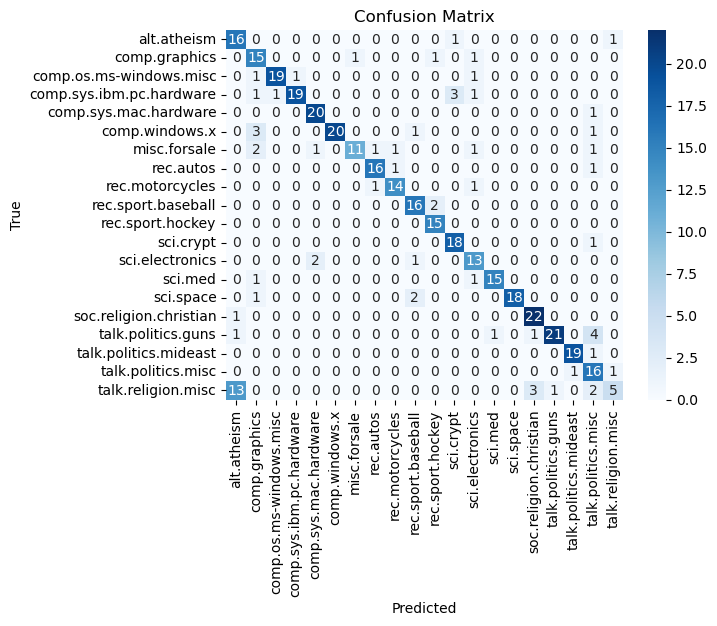

In [37]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Sentiment Analysis

In [39]:
def analyze_sentiment(text):
    analysis = TextBlob(text).sentiment
    if analysis.polarity > 0:
        return 'Positive'
    elif analysis.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment'] = data['Data'].apply(analyze_sentiment)


In [41]:
# Sentiment Distribution
print("\nSentiment Distribution:")
print(data['Sentiment'].value_counts())



Sentiment Distribution:
Sentiment
Positive    1451
Negative     546
Neutral        3
Name: count, dtype: int64


C:\Users\Sonam Sherkar\AppData\Local\Temp\ipykernel_18892\128551773.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Sentiment', palette='viridis')


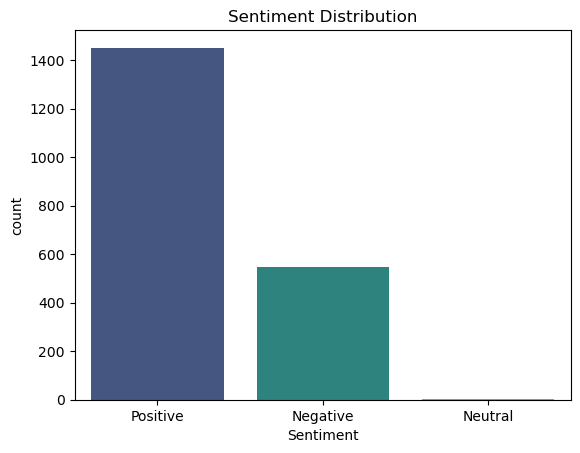

In [43]:
sns.countplot(data=data, x='Sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.show()


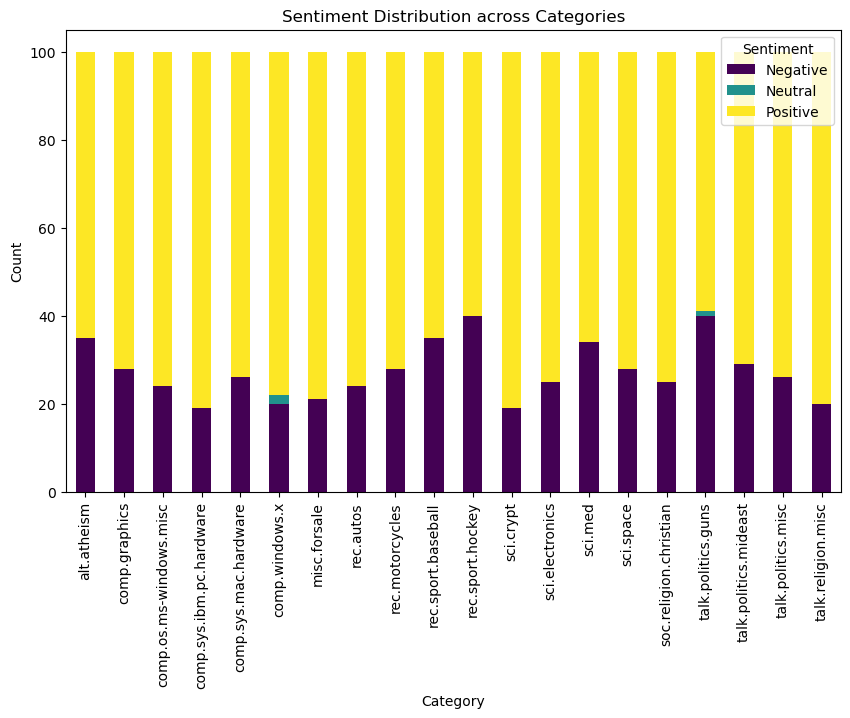

In [45]:
# Sentiment Analysis across Categories
sentiment_category_dist = data.groupby(['Labels', 'Sentiment']).size().unstack()
sentiment_category_dist.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Sentiment Distribution across Categories')
plt.ylabel('Count')
plt.xlabel('Category')
plt.legend(title='Sentiment')
plt.show()
